# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "31"
COLLABORATORS = "Aleksandra Grot 407392, Malgorzata Serwanska 405044, Adam Lewinski 407657"

---

## Zestaw zadań 9: Analiza danych przestrzennych z wykorzystaniem pakietów GeoPandas i PySAL (część 3)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import libpysal as ps
import pointpats as pp

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [4]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    # YOUR CODE HERE
    G=1-np.exp(-intensity*np.pi*d*d)
    df={"D":d,"G":G}
    return pd.DataFrame(df)

def f_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji F.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.

    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """  
    # YOUR CODE HERE
    F=1-np.exp(-intensity*np.pi*d*d)
    df={"D":d,"F":F}
    return pd.DataFrame(df)

#### UWAGA!
Znaczna część przykładów i dokumentacji modułów wchodzących w skład pakietu pysal dostępna w internecie nie dotyczny ich najnowszych wersji.
Z tego powodu lepiej jest zdobywać informacje na temat wykorzystywanych modułów, klas i funkcji z wykorzystaniem funkcji help(), np.: help(ps), help(pp), help(pp.pointpattern).

### Import i przygotowanie danych

In [5]:
# Kraj
# YOUR CODE HERE
df_kraj = gpd.read_file("Kraj.zip")
points_1=gpd.read_file("points_1.zip")
points_2=gpd.read_file("points_2.zip")
points_3=gpd.read_file("points_3.zip")
help(pp.distance_statistics.g)

Help on function g in module pointpats.distance_statistics:

g(coordinates, support=None, distances=None, metric='euclidean', edge_correction=None)
    Ripley's G function
    
    The G function is computed from the cumulative density function of the nearest neighbor 
    distances between points in the pattern. 
    
    Parameters
    -----------
    coordinates : numpy.ndarray of shape (n,2)
        input coordinates to function
    support : tuple of length 1, 2, or 3, int, or numpy.ndarray
        tuple, encoding (stop,), (start, stop), or (start, stop, num)
        int, encoding number of equally-spaced intervals
        numpy.ndarray, used directly within numpy.histogram
    distances: numpy.ndarray, (n, n) or (n,)
        distances from every point in the point to another point in `coordinates`
    metric: str or callable
        distance metric to use when building search tree
    edge_correction: bool or str
        whether or not to conduct edge correction. Not yet implemen

### Zadanie 1: Funkcja G (15 pkt)
Wykorzystując funkcję `pointpats.distance_statistics.g()` przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla rozkładów punktów z plików points_1.zip, points_2.zip i points_3.zip. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o odpowiednio dobranej intensywności. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. 

#### a) Przygotowanie funkcji

In [6]:
def g_function(points, intervals):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """
    # YOUR CODE HERE
    P = []
    for index, row in points.iteritems():
        P.append([row.x, row.y])
    #punkty=pp.PointPattern(P)
    gp=pp.distance_statistics.g(P,intervals)
    #print(gp[1])
    d={'D':gp[0],'G':gp[1]}
    return pd.DataFrame(d)
    
    
    

#### b) Wygenerowanie danych

In [7]:
# YOUR CODE HERE
result_1=g_function(points_1.geometry,200)
result_2=g_function(points_2.geometry,200)
result_3=g_function(points_3.geometry,200)
teoretic_poisson=g_function_poisson(result_1["D"],float(len(points_1)/df_kraj.area))
teoretic_regular=g_function_poisson(result_2["D"],float(len(points_2)/df_kraj.area))
teoretic_materna=g_function_poisson(result_3["D"],float(len(points_3)/df_kraj.area))

#### c) Wizualizacja

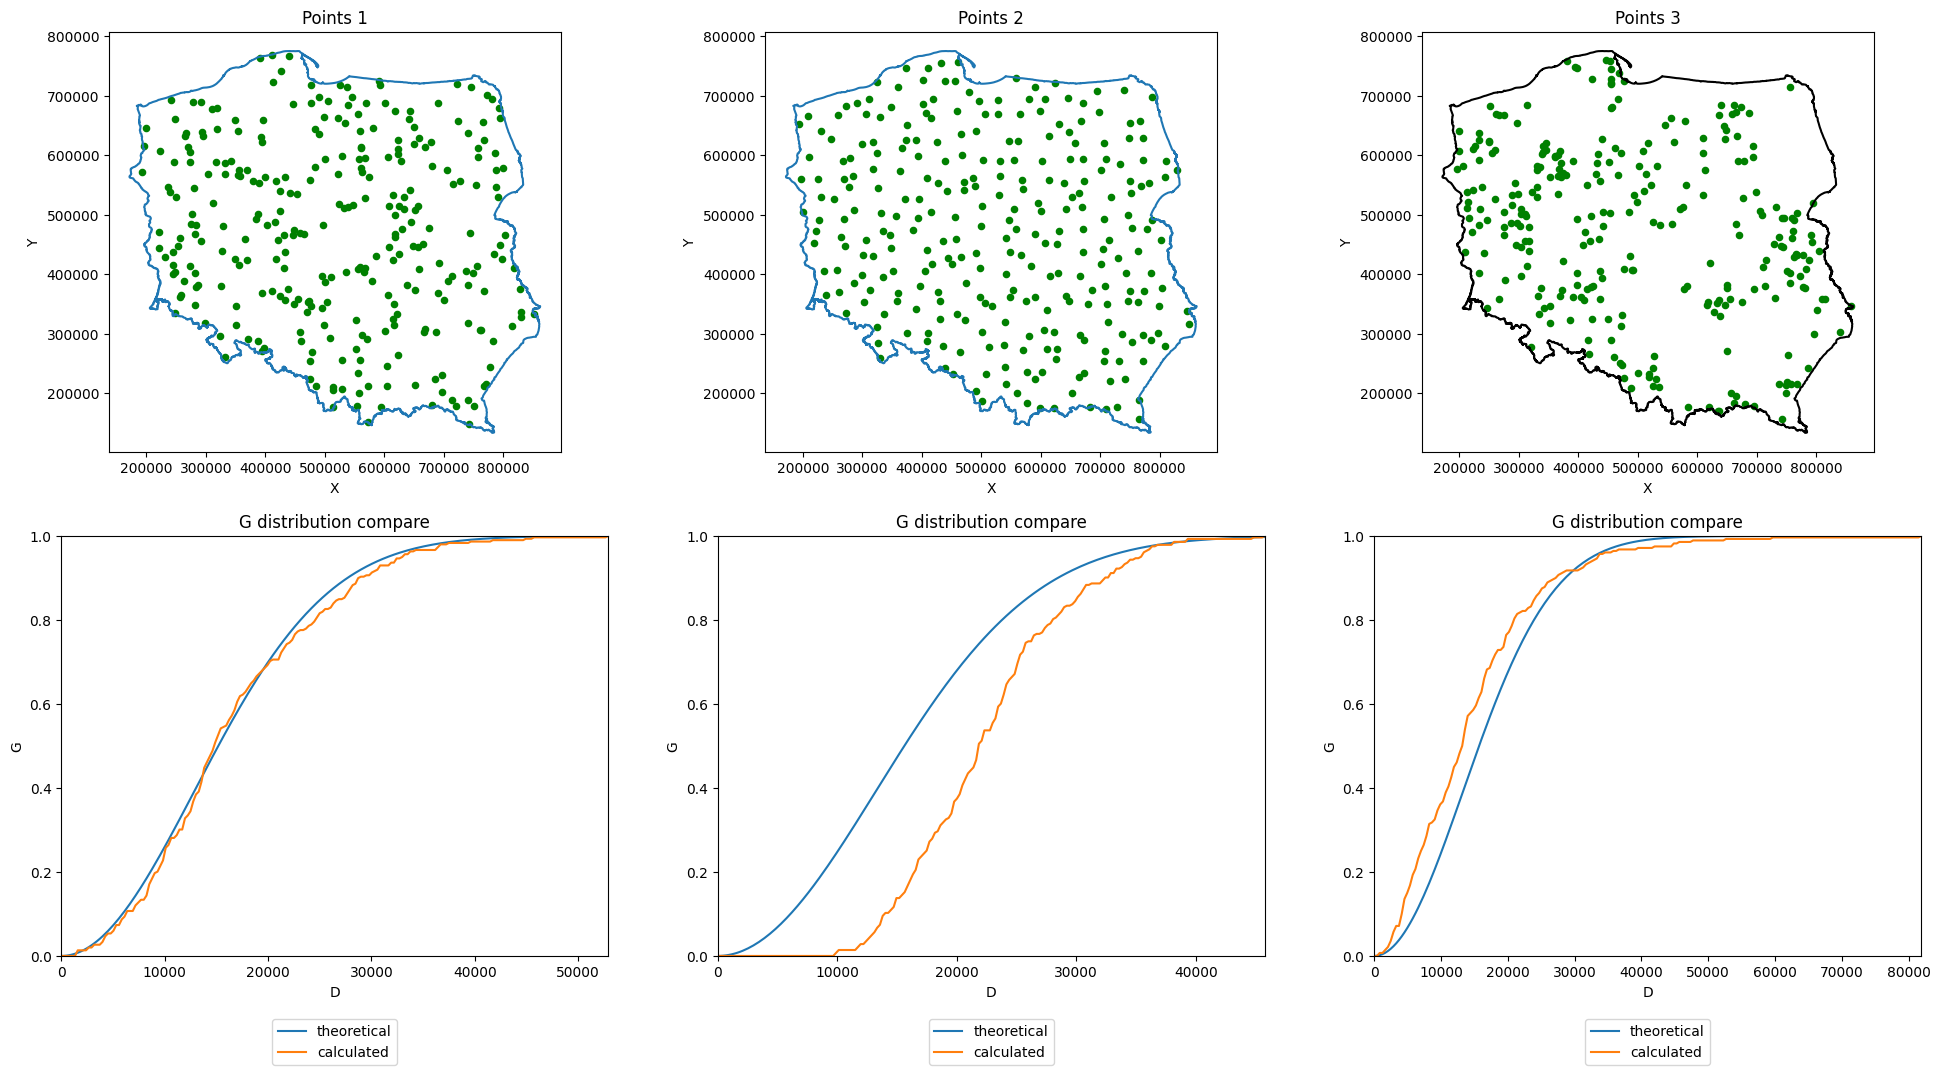

In [8]:
# YOUR CODE HERE
fig,ax=plt.subplots(2,3,figsize=(24,12))
points_1.plot(ax=ax[0,0],color='green', marker='o',linewidth=2, markersize=12)
df_kraj.boundary.plot(ax=ax[0,0])
ax[0,0].set_title("Points 1")
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")

ax[0,1].grid(False)
points_2.plot(ax=ax[0,1],color='green', marker='o',linewidth=2, markersize=12)
df_kraj.boundary.plot(ax=ax[0,1])
ax[0,1].set_title("Points 2")
ax[0,1].set_xlabel("X")
ax[0,1].set_ylabel("Y")

ax[0,2].grid(False)
points_3.plot(ax=ax[0,2],color='green', marker='o',linewidth=2, markersize=12)
df_kraj.boundary.plot(ax=ax[0,2],color='black')
ax[0,2].set_title("Points 3")
ax[0,2].set_xlabel("X")
ax[0,2].set_ylabel("Y")

ax[1,0].grid(False)
ax[1,0].plot(teoretic_poisson["D"],teoretic_poisson["G"],label='theoretical')
ax[1,0].plot(result_1["D"],result_1["G"],label='calculated')
ax[1,0].set_title("G distribution compare")
ax[1,0].set_xlim([0,np.max(result_1["D"])])
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel("D")
ax[1,0].set_ylabel("G")
ax[1,0].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)

ax[1,1].grid(False)
ax[1,1].plot(teoretic_regular["D"],teoretic_regular["G"],label='theoretical')
ax[1,1].plot(result_2["D"],result_2["G"],label='calculated')
ax[1,1].set_title("G distribution compare")
ax[1,1].set_xlim([0,np.max(result_2["D"])])
ax[1,1].set_ylim([0,1])
ax[1,1].set_xlabel("D")
ax[1,1].set_ylabel("G")
ax[1,1].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)

ax[1,2].grid(False)
ax[1,2].plot(teoretic_materna["D"],teoretic_materna["G"],label='theoretical')
ax[1,2].plot(result_3["D"],result_3["G"],label='calculated')
ax[1,2].set_title("G distribution compare")
ax[1,2].set_xlim([0,np.max(result_3["D"])])
ax[1,2].set_ylim([0,1])
ax[1,2].set_xlabel("D")
ax[1,2].set_ylabel("G")
ax[1,2].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)


### Zadanie 2: Funkcja F (15 pkt)

Wykorzystując funkcję `pointpats.distance_statistics.f()` przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla rozkładów punktów z plików points_1.zip, points_2.zip i points_3.zip. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o odpowiednio dobranej intensywności. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. 

#### a) Przygotowanie funkcji

In [9]:
def f_function(points, intervals, polygon):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    polygon: Polygon
        Obszar, na którym mają zostać wygenerowane punkty procesu testowego.
        
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """
    # YOUR CODE HERE
    P = []
    for index, row in points.iteritems():
        P.append([row.x, row.y])
    gp=pp.distance_statistics.f(P,intervals, hull = polygon)
    #print(gp.F)
    d={'D':gp[0],'F':gp[1]}
    return pd.DataFrame(d)

#### b) Wygenerowanie danych

In [15]:
# YOUR CODE HERE
resultF_1=f_function(points_1.geometry,200,df_kraj.geometry[0])
resultF_2=f_function(points_2.geometry,200,df_kraj.geometry[0])
resultF_3=f_function(points_3.geometry,200,df_kraj.geometry[0])
teoretic_poisson=f_function_poisson(result_1["D"],float(len(points_1)/df_kraj.area))
teoretic_regular=f_function_poisson(result_2["D"],float(len(points_2)/df_kraj.area))
teoretic_materna=f_function_poisson(result_3["D"],float(len(points_3)/df_kraj.area))

#### c) Wizualizacja

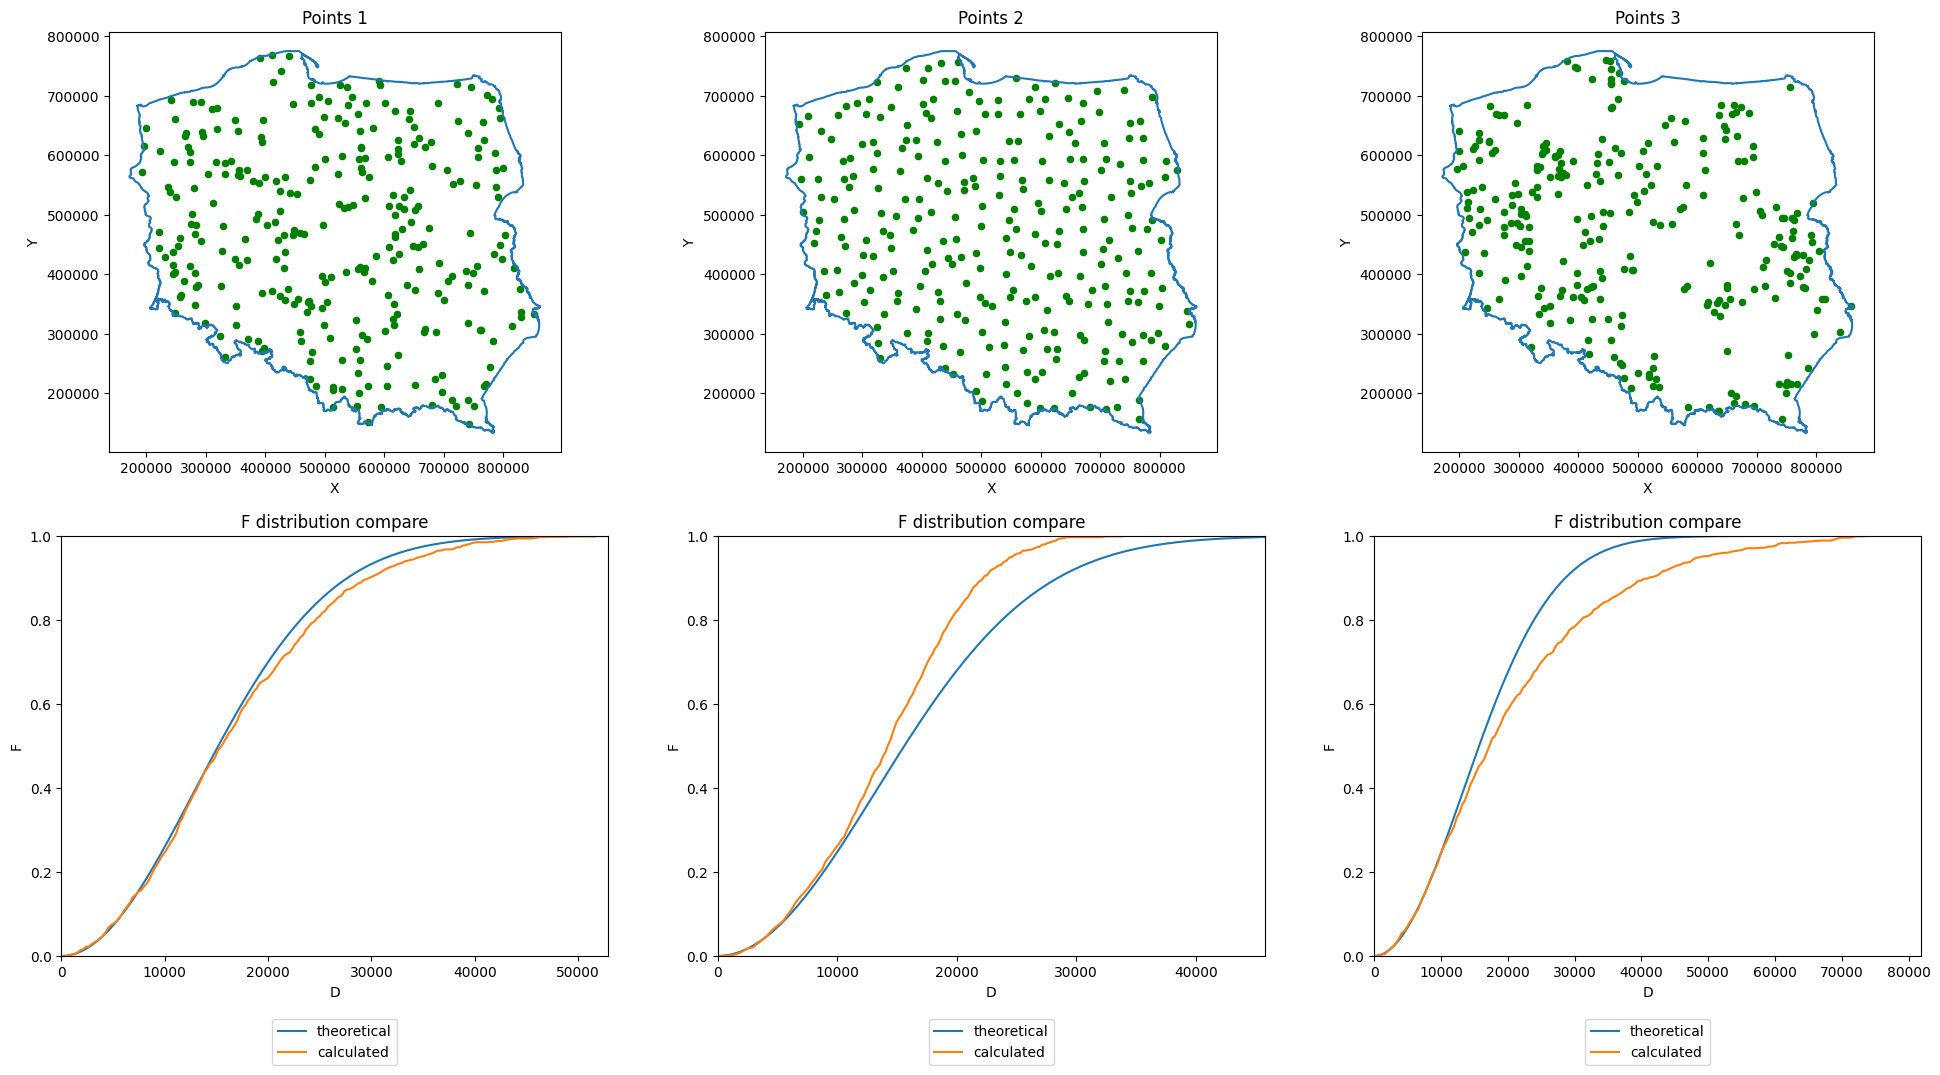

In [11]:
# YOUR CODE HERE
# YOUR CODE HERE
fig,ax=plt.subplots(2,3,figsize=(24,12))
ax[0,0].grid(False)
points_1.plot(ax=ax[0,0],color='green', marker='o',linewidth=2, markersize=12)
df_kraj.boundary.plot(ax=ax[0,0])
ax[0,0].set_title("Points 1")
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")


ax[0,1].grid(False)
points_2.plot(ax=ax[0,1],color='green', marker='o',linewidth=2, markersize=12)
df_kraj.boundary.plot(ax=ax[0,1])
ax[0,1].set_title("Points 2")
ax[0,1].set_xlabel("X")
ax[0,1].set_ylabel("Y")

ax[0,2].grid(False)
points_3.plot(ax=ax[0,2],color='green', marker='o',linewidth=2, markersize=12)
df_kraj.boundary.plot(ax=ax[0,2])
ax[0,2].set_title("Points 3")
ax[0,2].set_xlabel("X")
ax[0,2].set_ylabel("Y")

ax[1,0].grid(False)
ax[1,0].plot(teoretic_poisson["D"],teoretic_poisson["F"],label='theoretical')
ax[1,0].plot(resultF_1["D"],resultF_1["F"],label='calculated')
ax[1,0].set_title("F distribution compare")
ax[1,0].set_xlim([0,np.max(resultF_1["D"])])
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel("D")
ax[1,0].set_ylabel("F")
ax[1,0].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)

ax[1,1].grid(False)
ax[1,1].plot(teoretic_regular["D"],teoretic_regular["F"],label='theoretical')
ax[1,1].plot(resultF_2["D"],resultF_2["F"],label='calculated')
ax[1,1].set_title("F distribution compare")
ax[1,1].set_xlim([0,np.max(resultF_2["D"])])
ax[1,1].set_ylim([0,1])
ax[1,1].set_xlabel("D")
ax[1,1].set_ylabel("F")
ax[1,1].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)

ax[1,2].grid(False)
ax[1,2].plot(teoretic_materna["D"],teoretic_materna["F"],label='theoretical')
ax[1,2].plot(resultF_3["D"],resultF_3["F"],label='calculated')
ax[1,2].set_title("F distribution compare")
ax[1,2].set_xlim([0,np.max(resultF_3["D"])])
ax[1,2].set_ylim([0,1])
ax[1,2].set_xlabel("D")
ax[1,2].set_ylabel("F")
ax[1,2].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)


### Zadanie 3: Analiza Monte-Carlo na przykładzie funkcji G (20 pkt)

Korzystając z funkcji `pointpats.distance_statistics.g_test()` przygotuj funkcję `g_test_mc()`, która będzie przeprowadzała analizę Monte-Carlo testowanego rozkładu funkcji oraz przygotowywała dane niezbędne do wizualizacji wyników testu.

Funkcja `pointpats.distance_statistics.g_test()` może zostać wykorzystana do wielokrotnego zasymulowania jednorodnego procesu poissona o intensywności równej intensywności testowanego procesu i wyliczeniu funkcji G dla każdego z zasymulowanych rozkładów. Funkcje te mogą posłużyć do wykreślenia obwiedni. Jeżeli funkcja G analizowanego rozkładu w całości znajduje się w obwiedni to nie pa podstaw do odrzucenia HO na rzecz H1. W przeciwnym przypadku następuje odrzucenie H0 na rzecz H1. Poziom istotności wykonywanego testu $\alpha= \frac{2}{n-1}$, gdzie $n$ to liczba wykonywanych symulacji.

Następnie wykorzystaj przygotowane funkcje do przetestowania rozkładów punktów z plików points_1.zip, points_2.zip i points_3.zip na poziomie istotności $\alpha=0.05$. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów z wygenerowaną obwiednią wykorzystywaną w teście statystycznym. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. <br/>

Przykładowe wyniki pracy funkcji `g_test_mc()`: <br/>
<br/>
`H0: Testowana zmienna ma jednorodny rozkład losowy Poissona` <br/>
`H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona` <br/>
`Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.02` <br/>
<br/>
`H0: Testowana zmienna ma jednorodny rozkład losowy Poissona` <br/>
`H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona` <br/>
`Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = 0.02` <br/>

#### a) Przygotowanie funkcji

In [12]:
def g_test_mc(points, intervals, polygon, number_of_simulations):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do największej odległosci do najbliższego sąsiada.
    polygon: Polygon
        Obszar, na którym mają zostać wygenerowane punkty procesu testowego.
    number_of_simulations: int
        Liczba dodania określająca liczbę wykonywanych symulacji.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
        - "G_min" - zawierającą dolne wartości obwiedni funkcji G.
        - "G_max" - zawierającą górne wartości obwiedni funkcji G.
    """  
    # YOUR CODE HERE
    P = []
    for index, row in points.iteritems():
        P.append([row.x, row.y])
    gp=pp.distance_statistics.g_test(np.array(P),intervals, hull = polygon, n_simulations = number_of_simulations, keep_simulations = True)
    G_MIN = [1 for i in range(len(gp[3][0]))]
    G_MAX = [0 for i in range(len(gp[3][0]))]
    for array in gp[3]:
        for i in range(len(array)):
            if(G_MIN[i] > array[i]):
                G_MIN[i] = array[i]
            if(G_MAX[i] < array[i]):
                G_MAX[i] = array[i]
    d={'D':gp[0],'G':gp[1], "G_min":G_MIN, "G_max":G_MAX}
    print("H0: Testowana zmienna ma jednorodny rozkład losowy Poissona")
    print("H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona")
    vul = 0
    for i in range(len(gp[1])):
        if(gp[1][i] > G_MAX[i] or gp[1][i] < G_MIN[i]):
            vul = 1
            #print(G_MIN[i] , " " , gp[1][i], " " , G_MAX[i] )
    if vul:
        print(f"Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = {2/(number_of_simulations-1)}")
    else:
        print(f"Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = {2/(number_of_simulations-1)}")
    return pd.DataFrame(d)

#### b) Wygenerowanie danych

In [13]:
# YOUR CODE HERE
n_simulations = 41
resultG_1=g_test_mc(points_1.geometry,200,df_kraj.geometry[0], n_simulations)
resultG_2=g_test_mc(points_2.geometry,200,df_kraj.geometry[0], n_simulations)
resultG_3=g_test_mc(points_3.geometry,200,df_kraj.geometry[0], n_simulations)


H0: Testowana zmienna ma jednorodny rozkład losowy Poissona
H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.05
H0: Testowana zmienna ma jednorodny rozkład losowy Poissona
H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.05
H0: Testowana zmienna ma jednorodny rozkład losowy Poissona
H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.05


#### c) Wizualizacja

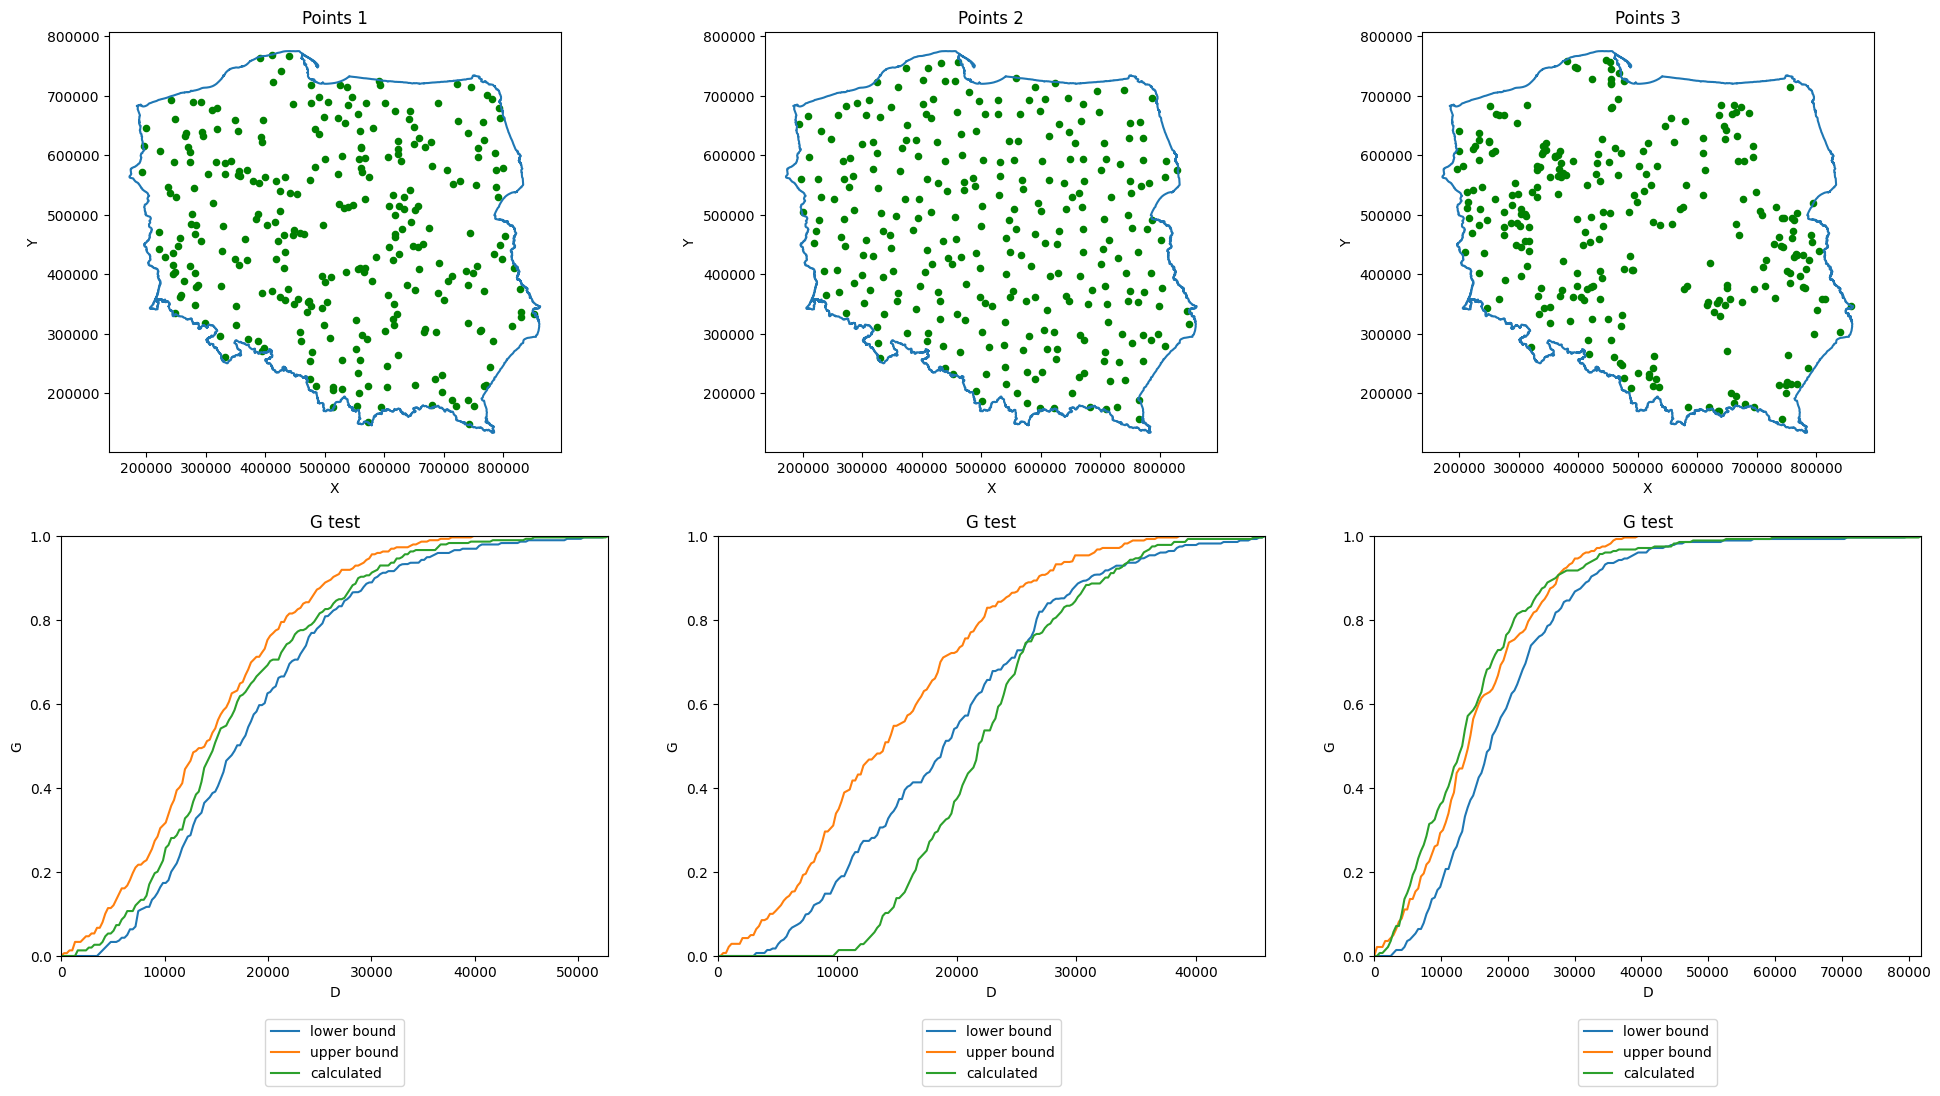

In [16]:
# YOUR CODE HERE
fig,ax=plt.subplots(2,3,figsize=(24,12))
ax[0,0].grid(False)
points_1.plot(ax=ax[0,0],color='green', marker='o',linewidth=2, markersize=12)
df_kraj.boundary.plot(ax=ax[0,0])
ax[0,0].set_title("Points 1")
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")


ax[0,1].grid(False)
points_2.plot(ax=ax[0,1],color='green', marker='o',linewidth=2, markersize=12)
df_kraj.boundary.plot(ax=ax[0,1])
ax[0,1].set_title("Points 2")
ax[0,1].set_xlabel("X")
ax[0,1].set_ylabel("Y")

ax[0,2].grid(False)
points_3.plot(ax=ax[0,2],color='green', marker='o',linewidth=2, markersize=12)
df_kraj.boundary.plot(ax=ax[0,2])
ax[0,2].set_title("Points 3")
ax[0,2].set_xlabel("X")
ax[0,2].set_ylabel("Y")

ax[1,0].grid(False)
ax[1,0].plot(resultG_1["D"],resultG_1["G_min"],label='lower bound')
ax[1,0].plot(resultG_1["D"],resultG_1["G_max"],label='upper bound')
ax[1,0].plot(resultG_1["D"],resultG_1["G"],label='calculated')
ax[1,0].set_title("G test")
ax[1,0].set_xlim([0,np.max(resultG_1["D"])])
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel("D")
ax[1,0].set_ylabel("G")
ax[1,0].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)

ax[1,1].grid(False)
ax[1,1].plot(resultG_2["D"],resultG_2["G_min"],label='lower bound')
ax[1,1].plot(resultG_2["D"],resultG_2["G_max"],label='upper bound')
ax[1,1].plot(resultG_2["D"],resultG_2["G"],label='calculated')
ax[1,1].set_title("G test")
ax[1,1].set_xlim([0,np.max(resultG_2["D"])])
ax[1,1].set_ylim([0,1])
ax[1,1].set_xlabel("D")
ax[1,1].set_ylabel("G")
ax[1,1].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)

ax[1,2].grid(False)
ax[1,2].plot(resultG_3["D"],resultG_3["G_min"],label='lower bound')
ax[1,2].plot(resultG_3["D"],resultG_3["G_max"],label='upper bound')
ax[1,2].plot(resultG_3["D"],resultG_3["G"],label='calculated')
ax[1,2].set_title("G test")
ax[1,2].set_xlim([0,np.max(resultG_3["D"])])
ax[1,2].set_ylim([0,1])
ax[1,2].set_xlabel("D")
ax[1,2].set_ylabel("G")
ax[1,2].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)